In [2]:
import THONKtools as THONK
import numpy as np
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp
import matplotlib.pylab as plt

In [3]:
data=pd.read_csv('measurements1',delimiter='\t',index_col=None)

In [4]:
data

,9.7,2266
0,12.7,2266
1,16.7,2265
2,20.2,2265
3,26.9,2261
4,27.8,2261
5,34.3,2260
6,35.5,2260


In [5]:
import numpy as np

with open ('measurements1','r') as myfile:
    dat=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray = dat.split(',')
array = np.array([float(i) for i in datarray[:-1]])

In [6]:
print(array)

[   9.7 2266.    12.7 2266.    16.7 2265.    20.2 2265.    26.9 2261.
   27.8 2261.    34.3 2260.    35.5 2260. ]


In [7]:
high=unp.uarray(array[0::4],0.5)
f=unp.uarray(array[1::4],0.5)
low=unp.uarray(array[2::4],0.5)

In [8]:
highn=unp.uarray([high[0].n-high[0].n,high[1].n-high[0].n,high[2].n-high[1].n,high[3].n-high[2].n],0.5)[1:]
lown=unp.uarray([low[0].n-low[0].n,low[1].n-low[0].n,low[2].n-low[1].n,low[3].n-low[2].n],0.5)[1:]
print(highn)
print(lown)

[7.0+/-0.5 10.2+/-0.5 7.399999999999999+/-0.5]
[7.5+/-0.5 7.600000000000001+/-0.5 7.699999999999999+/-0.5]


In [9]:
#THONK.linreg(data.height,data.frequency)
#plt.show()

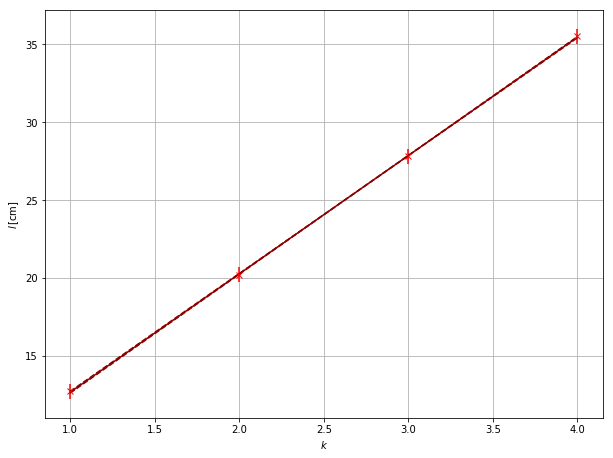

In [56]:
#plt.plot(unp.nominal_values(f[1:]),unp.nominal_values(highn),'x',color='lightblue')
#THONK.linreg(unp.nominal_values(f[1:]),unp.nominal_values(highn),color='blue')
#a1=THONK.a(unp.nominal_values(f[1:]),unp.nominal_values(highn))
plt.errorbar([1,2,3,4],unp.nominal_values(low),yerr=0.5,fmt='x',color='red')
THONK.linreg(np.array([1,2,3,4]),unp.nominal_values(low),color='darkred')
a2=THONK.a(np.array([1,2,3,4]),unp.nominal_values(low))
plt.grid()

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.xlabel(r'$k$')
plt.ylabel(r'$l\,[\mathrm{cm}]$')

plt.savefig(fname='1minimumonnly',dpi=300)


plt.show()

In [25]:
streuungh=np.std(unp.nominal_values(high))
streuungl=np.std(unp.nominal_values(low))
streuungf=np.std(unp.nominal_values(np.array([1,2,3,4])))
print(streuungh)
print(streuungl)
print(streuungf)
print(a2)

def b(x,y):
    n=len(x)
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(n*sum(x**2)-(sum(x))**2)

def a(x,y):
    n=len(x)
    return (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-(sum(x))**2)

def s(x,y):
    n=len(x)
    return np.sqrt(sum((y-a(x,y)-b(x,y)*x)**2)/(n-2))

def Da(x,y):
    n=len(x)
    return s(x,y)*np.sqrt(n/(n*sum(x**2)-(sum(x))**2))
print(Da(np.array([1,2,3,4]),unp.nominal_values(low)))

9.415943925066673
8.497205422961128
1.118033988749895
7.6
3.0173664013506887


#### Aus Steigung Wellenlaenge bestimmen

In [11]:
print(f**(-1)*33000)

[14.563106796116505+/-0.0032133951447741627
 14.56953642384106+/-0.0032162332061459295
 14.5953118089341+/-0.003227623133333503
 14.601769911504425+/-0.003230480068916908]


In [12]:
k=np.linspace(0,3,3)
def lam(l,k):
    return 4*l/(2*k+1)
print(lam(lown*2,k))

[60.0+/-4.0 15.200000000000003+/-1.0
 8.799999999999999+/-0.5714285714285714]


In [13]:
print(f[1:]*lown*2)
print('Streuung:',np.std(unp.nominal_values(f[1:]*lown*2)))
print('Mittelwert:',THONK.mean(f[1:]*lown*2))
print('t=',THONK.t(THONK.mean(f[1:]*lown*2),ufloat(34300,0)))

[33975.0+/-2265.0124171845064 34367.200000000004+/-2261.012773073164
 34804.0+/-2260.0131172185706]
Streuung: 338.6010566367971
Mittelwert: (3.44+/-0.13)e+04
t= 0.06283942045247899


In [44]:
print(f[1:]*a2)
print('Streuung:',np.std(unp.nominal_values(f[1:]*a2)))
print('Mittelwert:',THONK.mean(f[1:]*a2))
print('t=',THONK.t(THONK.mean(f[1:]*000.0027),ufloat(34300,0)))

[6.1155+/-0.00135 6.1047+/-0.00135 6.102+/-0.00135]
Streuung: 0.005832666628566911
Mittelwert: 6.1074+/-0.0008
t= 43999084.720378034


#### Abschaetzung

In [15]:
sinf=f[1]

In [13]:
with open ('measurements2','r') as myfile:
    dat2=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray2 = dat2.split(',')
array2 = np.array([float(i) for i in datarray2[:-1]])

In [14]:
high2=unp.uarray(array2[0::4],0.5)
f2=unp.uarray(array2[1::4],0.5)
low2=unp.uarray(array2[2::4],0.5)

In [15]:
highn2=unp.uarray([high2[0].n-high2[0].n,high2[1].n-high2[0].n,high2[2].n-high2[1].n,high2[3].n-high2[2].n],0.5)[1:]
lown2=unp.uarray([low2[0].n-low2[0].n,low2[1].n-low2[0].n,low2[2].n-low2[1].n,low2[3].n-low2[2].n],0.5)[1:]
print(highn2)
print(lown2)

[2.9000000000000004+/-0.5 2.5+/-0.5 6.600000000000001+/-0.5]
[2.9000000000000004+/-0.5 3.9000000000000004+/-0.5 6.800000000000001+/-0.5]


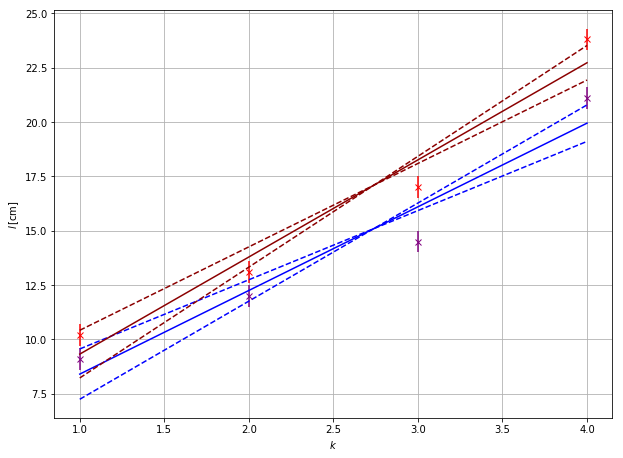

In [57]:
plt.errorbar([1,2,3,4],unp.nominal_values(high2),yerr=0.5,fmt='x',color='purple')
THONK.linreg([1,2,3,4],unp.nominal_values(high2),color='blue')
a3=THONK.a(np.array([1,2,3,4]),unp.nominal_values(high2))
plt.errorbar([1,2,3,4],unp.nominal_values(low2),yerr=0.5,fmt='x',color='red')
THONK.linreg([1,2,3,4],unp.nominal_values(low2),color='darkred')
a4=THONK.a(np.array([1,2,3,4]),unp.nominal_values(low2))
plt.grid()

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.xlabel(r'$k$')
plt.ylabel(r'$l\,[\mathrm{cm}]$')

plt.savefig(fname='1secondmeasurementminmax',dpi=300)

plt.show()

In [31]:
streuungh=np.std(unp.nominal_values(high2))
streuungl=np.std(unp.nominal_values(low2))
streuungf=np.std(unp.nominal_values(np.array([1,2,3,4])))
print(streuungh)
print(streuungl)
print(streuungf)
print(a4)

def b(x,y):
    n=len(x)
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(n*sum(x**2)-(sum(x))**2)

def a(x,y):
    n=len(x)
    return (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-(sum(x))**2)

def s(x,y):
    n=len(x)
    return np.sqrt(sum((y-a(x,y)-b(x,y)*x)**2)/(n-2))

def Da(x,y):
    n=len(x)
    return s(x,y)*np.sqrt(n/(n*sum(x**2)-(sum(x))**2))
print(Da(np.array([1,2,3,4]),unp.nominal_values(low2)))

4.431351374016735
5.096260884216977
1.118033988749895
4.470000000000004
0.7748935410751389


#### Streuung der Ergebnisse, Vergleich mit Abschaetzung fuer eine Frequenz aus Unsicherheit der Frequenzmessung und Wellenlaenge

[3.4000000000000004+/-0.5 6.000000000000002+/-0.5 5.199999999999999+/-0.5
 3.099999999999998+/-0.5]
[5.100000000000001+/-0.5 5.399999999999999+/-0.5 4.5+/-0.5
 2.6000000000000014+/-0.5]


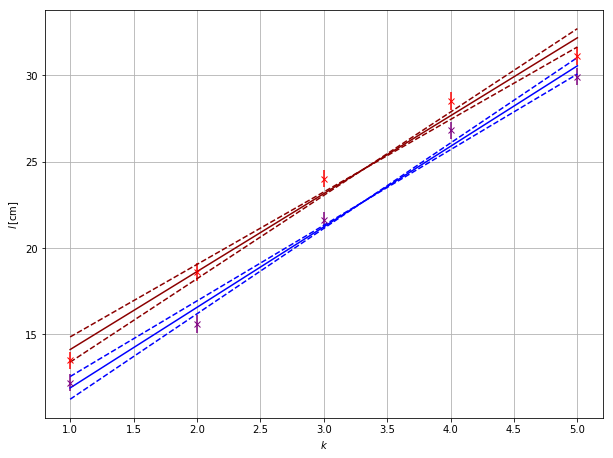

[36842.40000000001+/-3612.0036004965445
 38998.79999999999+/-3611.00403766044 32472.0+/-3608.0028062627666
 18756.40000000001+/-3607.0009370666926]
Streuung: 102.61450969526678
[24561.600000000002+/-3612.0016002211296
 43332.000000000015+/-3611.0049847653218 37523.2+/-3608.0037472264353
 22363.399999999983+/-3607.0013321317197]
Streuung: 100.13194495264734


In [58]:
with open ('measurements','r') as myfile:
    dat0=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray0 = dat0.split(',')
array0 = np.array([float(i) for i in datarray0[:-1]])

high0=unp.uarray(array0[0::4],0.5)
f0=unp.uarray(array0[1::4],0.5)
low0=unp.uarray(array0[2::4],0.5)

highn0=unp.uarray([high0[0].n-high0[0].n,high0[1].n-high0[0].n,high0[2].n-high0[1].n,high0[3].n-high0[2].n,high0[4].n-high0[3].n],0.5)[1:]
lown0=unp.uarray([low0[0].n-low0[0].n,low0[1].n-low0[0].n,low0[2].n-low0[1].n,low0[3].n-low0[2].n,low0[4].n-low0[3].n],0.5)[1:]
print(highn0)
print(lown0)

plt.errorbar(np.array([1,2,3,4,5]),unp.nominal_values(high0),yerr=0.5,fmt='x',color='purple')
THONK.linreg(np.array([1,2,3,4,5]),unp.nominal_values(high0),color='blue')
a5=THONK.a(np.array([1,2,3,4,5]),unp.nominal_values(high0))
plt.errorbar(np.array([1,2,3,4,5]),unp.nominal_values(low0),yerr=0.5,fmt='x',color='red')
THONK.linreg(np.array([1,2,3,4,5]),unp.nominal_values(low0),color='darkred')
a6=THONK.a(np.array([1,2,3,4,5]),unp.nominal_values(low0))
plt.grid()

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.xlabel(r'$k$')
plt.ylabel(r'$l\,[\mathrm{cm}]$')

plt.savefig(fname='1firstmeasurementminmax',dpi=300)

plt.show()

print(f0[1:]*lown0*2)
print('Streuung:',np.std(unp.nominal_values(np.array([1,2,3,4,5])*low0*2)))

print(f0[1:]*highn0*2)
print('Streuung:',np.std(unp.nominal_values(np.array([1,2,3,4,5])*high0*2)))

In [42]:
streuungh=np.std(unp.nominal_values(high2))
streuungl=np.std(unp.nominal_values(low2))
streuungf=np.std(unp.nominal_values(np.array([1,2,3,4])))
print(streuungh)
print(streuungl)
print(streuungf)
print(a6)

def b(x,y):
    n=len(x)
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(n*sum(x**2)-(sum(x))**2)

def a(x,y):
    n=len(x)
    return (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-(sum(x))**2)

def s(x,y):
    n=len(x)
    return np.sqrt(sum((y-a(x,y)-b(x,y)*x)**2)/(n-2))

def Da(x,y):
    n=len(x)
    return s(x,y)*np.sqrt(n/(n*sum(x**2)-(sum(x))**2))
print(Da(np.array([1,2,3,4,5]),unp.nominal_values(low0)))

4.431351374016735
5.096260884216977
1.118033988749895
4.510000000000004
5.109699925957796


## Part 3

In [43]:
with open ('part3measurements','r') as myfile:
    dat3=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray3 = dat3.split(',')
array3 = np.array([float(i) for i in datarray3[:-1]])

In [44]:
d=unp.uarray(array3[0::2],0.1)

t=unp.uarray(array3[1::2],100)*10**-6

f3=40367

print(d)
print(t)

[29.3+/-0.1 37.9+/-0.1 45.9+/-0.1 24.4+/-0.1 19.4+/-0.1]
[0.0024+/-9.999999999999999e-05
 0.0026999999999999997+/-9.999999999999999e-05
 0.0031999999999999997+/-9.999999999999999e-05
 0.002+/-9.999999999999999e-05 0.0018+/-9.999999999999999e-05]


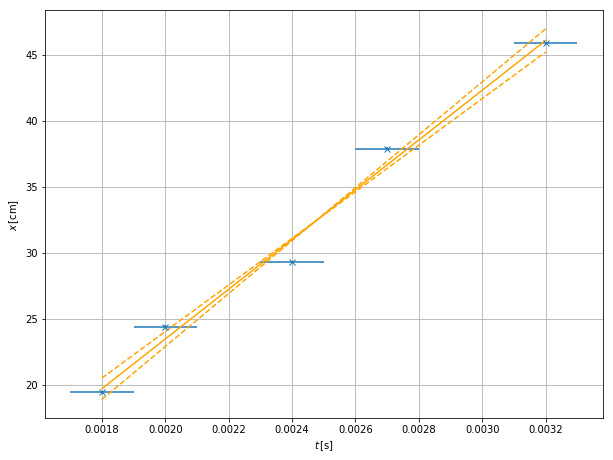

In [54]:
plt.errorbar(np.sort(unp.nominal_values(t)),np.sort(unp.nominal_values(d)),xerr=100*10**-6,yerr=0.1,fmt='x')
THONK.linreg(np.sort(unp.nominal_values(t)),np.sort(unp.nominal_values(d)),xnum=2)
plt.grid()

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.ylabel(r'$x\,[\mathrm{cm}]$')
plt.xlabel(r'$t\,[\mathrm{s}]$')

plt.savefig(fname='3xt',dpi=300)

plt.show()

In [49]:
st=THONK.a(np.sort(unp.nominal_values(t)),np.sort(unp.nominal_values(d)))
print(st*2)
print(st)

37743.589743589895
18871.794871794948


In [47]:
Dst=np.std(np.sort(unp.nominal_values(d)))
print(Dst)

9.485863165785178


In [59]:
print('t=',THONK.t(ufloat(st,Dst),ufloat(34300,0)))

t= 1626.4418807824966


In [60]:
print('t=',THONK.t(ufloat(st,3),ufloat(34300,0)))

t= 5142.7350427350175
